### Importing Libraries

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import joblib
import matplotlib.pyplot as plt

In [92]:
X_train = joblib.load('Data/X_train.pkl')
X_test = joblib.load('Data/X_test.pkl')
y_train = joblib.load('Data/y_train.pkl')
y_test = joblib.load('Data/y_test.pkl')

In [93]:
print(X_train)

481     Yo carlos, a few friends are already asking me...
3231    Guess he wants alone time. We could just show ...
4507                             Not able to do anything.
4079    Sir, good morning. Hope you had a good weekend...
1453                              Stupid.its not possible
                              ...                        
1946    Hey we can go jazz power yoga hip hop kb and y...
1079    Me too watching surya movie only. . .after 6 p...
1432               Thanks for ve lovely wisheds. You rock
3527    You are a å£1000 winner or Guaranteed Caller P...
3035                     ;-) ok. I feel like john lennon.
Name: v2, Length: 4457, dtype: object


### Feature Engineering

In [94]:
vectorizer = TfidfVectorizer()

X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')
 

In [95]:
print(X_train_features)
X_test_features.shape

  (0, 7685)	0.30510888945182146
  (0, 1677)	0.3292176290410558
  (0, 2834)	0.2837176104528575
  (0, 3011)	0.2778688878527953
  (0, 1051)	0.17759514728010561
  (0, 926)	0.25250294823541986
  (0, 1103)	0.34782368749107384
  (0, 4400)	0.1540188337310294
  (0, 754)	0.23084753697178773
  (0, 7690)	0.2248837434284068
  (0, 7571)	0.31119692214723843
  (0, 1123)	0.18203584156115174
  (0, 913)	0.20208989352242562
  (0, 6834)	0.190579379030142
  (0, 7416)	0.2996864076549548
  (1, 3271)	0.312694329900169
  (1, 3369)	0.22915631672738998
  (1, 7357)	0.33638334022348193
  (1, 923)	0.35867415293556965
  (1, 6882)	0.21612290982801508
  (1, 7393)	0.1927438176738606
  (1, 2038)	0.28217651788698506
  (1, 3871)	0.19008087074174285
  (1, 6108)	0.323180992867281
  (1, 7161)	0.20103358282727266
  :	:
  (4455, 1051)	0.1443579035714739
  (4455, 7690)	0.1827963559017057
  (4455, 6834)	0.15491211354639584
  (4455, 6912)	0.17770266832542606
  (4455, 3741)	0.12104504897343495
  (4455, 5001)	0.18729754592143535
  (

(1115, 7744)

In [96]:
y_train.shape

(4457,)

### Build and Train Model

In [97]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_features, y_train)

LogisticRegression(solver='liblinear')

### Evaluate Model

In [98]:
pred_training = model.predict(X_train_features)
metrics.accuracy_score(y_train, pred_training)

0.9750953556203724

In [99]:
pred_test = model.predict(X_test_features)
metrics.accuracy_score(y_test, pred_test)

0.968609865470852

In [100]:
metrics.confusion_matrix(y_test, pred_test)

array([[964,   3],
       [ 32, 116]], dtype=int64)

In [101]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       967
           1       0.97      0.78      0.87       148

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### Visualization

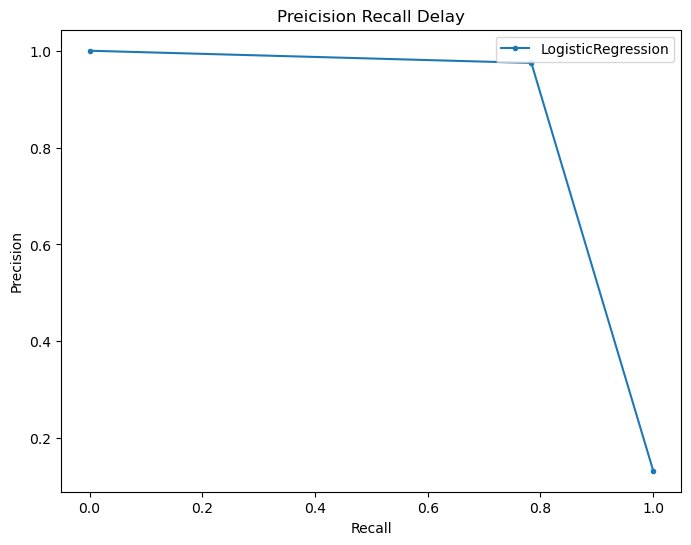

In [103]:
precision, recall, _ = metrics.precision_recall_curve(y_test, pred_test)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='LogisticRegression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Preicision Recall Delay')
plt.legend()
plt.show()

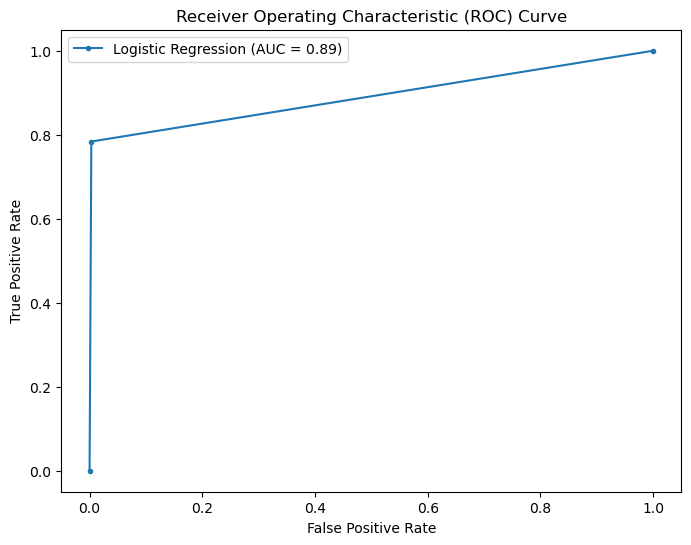

In [104]:
fpr, tpr, _ = metrics.roc_curve(y_test, pred_test)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
